# 1/19/21 - This notebook applies correlation tests (Spearman, Pearson, and Kendall) for autoz output and lens scores.
Spearman ranking - monotonic

Pearson ranking - linear

Kendall Tau - monotonic

In [1]:
# libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.stats as stats

%matplotlib inline

from astropy import constants as const
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

# paths
csv_path = '/data/sknabel/autoz_lens_model/files/csv/'
latest_path= f'{csv_path}latest/'
png_path = '/data/sknabel/autoz_lens_model/visuals/png/'
knabel2020_file_path = '/data/sknabel/lens_methods/files/'

In [2]:
# import samples
links = pd.read_csv(f'{latest_path}links_sample_latest_len40.csv')
links_knabel = pd.read_csv(f'{latest_path}links_knabel_sample_latest_len6.csv')
li = pd.read_csv(f'{latest_path}li_sample_latest_len3.csv')

print(len(links), len(links_knabel), len(li))

40 6 3


In [3]:
links.columns

Index(['Unnamed: 0', 'GAMA_ID', 'ID', 'RA_x', 'DEC_x', 'type',
       'corrected_stellar_mass', 'zlens', 'sigma_lens', 'zsource',
       'sigma_source', 'R', 'dlens', 'dsource', 'Z', 'STELLAR_MASS', 'z1',
       'sigma1', 'template1', 'z2', 'sigma2', 'template2', 'sigma3', 'sigma4',
       'prob', 'error', 'score', 'P1', 'P3'],
      dtype='object')

In [4]:
# make new column to normalize scores to [0, 1]
links['normalized_score'] = links.score/70.
links_knabel['normalized_score'] = links_knabel.score/70.
li['normalized_score'] = li.score/10.

#print(links.normalized_score, li.normalized_score)

# make new column that is best probability measurement
# for links
links["cnn_probability"] = np.zeros(len(links))

for i in range(len(links)):
    probabilities = np.nan_to_num([links.P1[i], links.P3[i]])#, samples.prob[i]])
    print((probabilities))
    links['cnn_probability'][i] = np.max(probabilities)

# for links_knabel
links_knabel["cnn_probability"] = np.zeros(len(links_knabel))

for i in range(len(links_knabel)):
    probabilities = np.nan_to_num([links_knabel.P1[i], links_knabel.P3[i]])#, samples.prob[i]])
    print((probabilities))
    links_knabel['cnn_probability'][i] = np.max(probabilities)
                                   
# for li
li["cnn_probability"] = li.prob            

# merge to one catalog for correlation tests
samples = pd.concat([links, li])
samples.reset_index(inplace=True)
samples.drop(columns={'index'}, inplace=True)
print(samples.columns, len(samples))

# make new column that is best probability measurement
#samples["cnn_probability"] = np.zeros(len(samples))

#for i in range(len(samples)):
#    probabilities = np.nan_to_num([samples.P1[i], samples.P3[i], samples.prob[i]])
#    print((probabilities))
#    samples['cnn_probability'][i] = np.max(probabilities)
    
samples["cnn_probability"]

[0.832 0.   ]
[0.901 0.   ]
[0.876 0.   ]
[0.895 0.   ]
[0.909 0.   ]
[0.837 0.   ]
[0.   0.98]
[0.89  0.981]
[0.994 0.99 ]
[0.    0.812]
[0.    0.912]
[0.988 0.   ]
[0.812 0.   ]
[0.    0.862]
[0.    0.895]
[0.    0.964]
[0.903 0.   ]


/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


[0.999 1.   ]
[1. 1.]
[0.838 0.   ]
[0.929 0.   ]
[0.929 0.   ]
[0.843 0.   ]
[0.855 0.96 ]
[0.997 0.   ]
[0.    0.986]
[0.975 0.826]
[0.82 0.  ]
[0.    0.883]
[0.906 0.807]
[0.997 0.959]
[0.968 0.975]
[0.887 0.99 ]
[0.98  0.931]
[0.866 0.   ]
[0.843 0.   ]
[0.975 0.986]
[0.892 0.   ]
[0.959 0.   ]
[0.824 0.961]
[0.837 0.   ]
[0.988 0.   ]
[0.999 1.   ]
[1. 1.]
[0.929 0.   ]
[0.    0.883]
Index(['D1', 'D2', 'DEC', 'DEC_x', 'GAMA_ID', 'ID', 'KIDS_ID', 'P1', 'P3', 'R',
       'RA', 'RA_x', 'STELLAR_MASS', 'Unnamed: 0', 'Unnamed: 0.1', 'Z',
       'cnn_probability', 'corrected_stellar_mass', 'dlens', 'dsource',
       'error', 'f_dm', 'mag', 'mag_err', 'name', 'normalized_score', 'num_0',
       'prob', 'probability', 'rms', 's*p/10', 'score', 'sigma1', 'sigma2',
       'sigma3', 'sigma4', 'sigma_lens', 'sigma_source', 'template1',
       'template2', 'theta_e_Ang_slide', 'type', 'z1', 'z2', 'z_max', 'z_min',
       'zlens', 'zphot', 'zsource'],
      dtype='object') 43


/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



0     0.832000
1     0.901000
2     0.876000
3     0.895000
4     0.909000
5     0.837000
6     0.980000
7     0.981000
8     0.994000
9     0.812000
10    0.912000
11    0.988000
12    0.812000
13    0.862000
14    0.895000
15    0.964000
16    0.903000
17    1.000000
18    1.000000
19    0.838000
20    0.929000
21    0.929000
22    0.843000
23    0.960000
24    0.997000
25    0.986000
26    0.975000
27    0.820000
28    0.883000
29    0.906000
30    0.997000
31    0.975000
32    0.990000
33    0.980000
34    0.866000
35    0.843000
36    0.986000
37    0.892000
38    0.959000
39    0.961000
40    1.000000
41    0.999391
42    0.996585
Name: cnn_probability, dtype: float64

In [5]:
print(stats.spearmanr(samples.normalized_score, samples.sigma2)[:])
print(stats.pearsonr(samples.normalized_score, samples.sigma2)[:])
print(stats.kendalltau(samples.normalized_score, samples.sigma2)[:])
#print(stats.spearmanr(samples.sigma2, samples.normalized_score)[:])
#print(stats.pearsonr(samples.sigma2, samples.normalized_score)[:])
#print(stats.kendalltau(samples.sigma2, samples.normalized_score)[:])
# order doesn't matter

(0.2431045573271371, 0.11622037115531086)
(0.28020956807068753, 0.06876436306493555)
(0.1859664399600588, 0.10853158451825626)


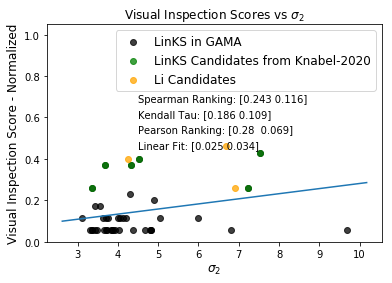

In [6]:
# visual inspection score to sigma2

spear = np.around(stats.spearmanr(samples.normalized_score, samples.sigma2)[:], 3)
pears = np.around(stats.pearsonr(samples.normalized_score, samples.sigma2)[:], 3)
kendall = np.around(stats.kendalltau(samples.normalized_score, samples.sigma2)[:], 3)

# fit a line
model = np.polyfit(samples.sigma2, samples.normalized_score, 1)
x = np.linspace(np.min(samples.sigma2) - 0.5, np.max(samples.sigma2) + 0.5, num=100)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(#links.R,
          links.sigma2,
    links.normalized_score,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(#links_identified.R,
           links_knabel.sigma2,
    links_knabel.normalized_score,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(#li.R,
           li.sigma2,
    li.normalized_score,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
ax.plot(x, model[0]*x + model[1])

plt.annotate(f'Spearman Ranking: {spear}', (4.5, 0.675))
plt.annotate(f'Kendall Tau: {kendall}', (4.5, 0.6))
plt.annotate(f'Pearson Ranking: {pears}', (4.5, 0.525))
plt.annotate(f'Linear Fit: {np.around(model, 3)}', (4.5, 0.45))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('Visual Inspection Score - Normalized', fontsize = 12)
ax.set_xlabel('$\sigma_2$',  fontsize = 12)
ax.set_title('Visual Inspection Scores vs $\sigma_2$')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig(f'{png_path}visual_score_to_sigma2_011821.png')

[array([0.243, 0.116]), array([0.28 , 0.069]), array([0.186, 0.109]), array([0.02467097, 0.03443322])]
mean, std 0.02719804488336925 0.017399374160498776
mean, std 0.024330716430847287 0.07344527709045977


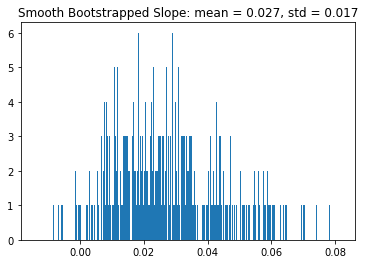

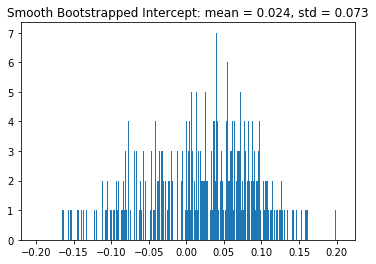

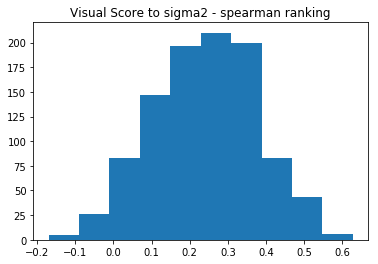

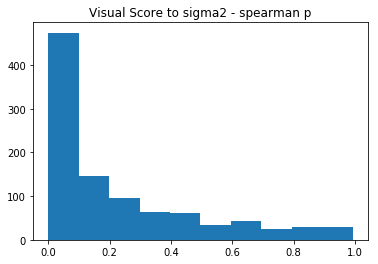

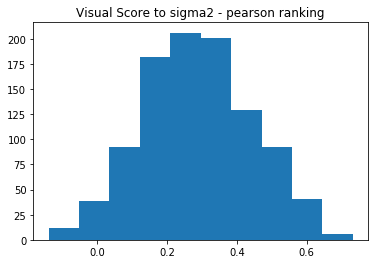

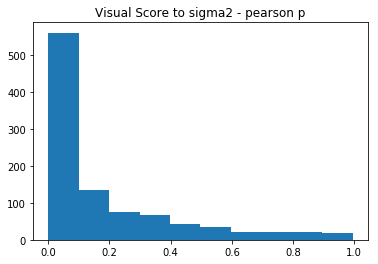

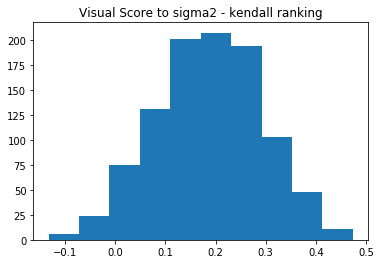

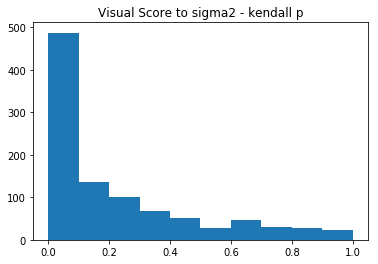

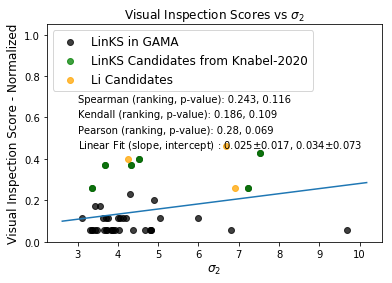

In [49]:
# run bootstrapping to see how the rankings change for normalized_score to sigma2 and R
# sigma2

# create array to show stats (columns=spearman ranking, p,pearson ranking, p,kendall ranking, p), 43 iterations
bootstrapping_sigma2 = np.zeros((1000, 8), dtype=float)

#print(bootstrapping_sigma2)

spear = np.around(stats.spearmanr(samples.normalized_score, samples.sigma2)[:], 3)
pears = np.around(stats.pearsonr(samples.normalized_score, samples.sigma2)[:], 3)
kendall = np.around(stats.kendalltau(samples.normalized_score, samples.sigma2)[:], 3)
linear = np.polyfit(samples.sigma2, samples.normalized_score, 1)

full_sample=[spear, pears, kendall, linear]
print(full_sample)

# take random samples of 30, omit 13 and replace with values from the 30
for i in range(1000):
    # shuffle the sample
    indices = np.arange(43)
    #print(indices)
    np.random.shuffle(indices)
    #print(indices)
    subsample_index = indices[:30]
    #print(len(np.unique(subsample_index)))
    bootstrap_index = np.random.choice(subsample_index, 13) # subsample 13 from subsample
    new_sample_index = np.concatenate((subsample_index, bootstrap_index)) # concat to new sample
    new_sample = samples.iloc[new_sample_index]
    # smooth x-values (sigma2) using random gaussian
    #print(new_sample.sigma2)
    #print(new_sample)
    
    # run tests
    spear = np.around(stats.spearmanr(new_sample.normalized_score, new_sample.sigma2)[:], 3)
    pears = np.around(stats.pearsonr(new_sample.normalized_score, new_sample.sigma2)[:], 3)
    kendall = np.around(stats.kendalltau(new_sample.normalized_score, new_sample.sigma2)[:], 3)
    linear = np.around(np.polyfit(new_sample.sigma2, new_sample.normalized_score, 1)[:], 3)
    #print(linear)
    #print(new_sample[['sigma2', 'normalized_score']])
    #print(linear)
    bootstrapping_sigma2[i] = (spear[0], spear[1], 
                               pears[0], pears[1], 
                               kendall[0], kendall[1],
                              linear[0], linear[1])
    smoothed_slopes = bootstrapping_sigma2[:,6] + np.random.normal(loc=0.0, scale=0.001, size=1000)
    smoothed_intercepts = bootstrapping_sigma2[:,7] + np.random.normal(loc=0.0, scale=0.001, size=1000) 
#print(bootstrapping_sigma2)
#print(bootstrapping_sigma2[:,6:])
fig, ax = plt.subplots()
ax.hist(smoothed_slopes, bins=1000)#, normed=True)
ax.set_title(f'Smooth Bootstrapped Slope: mean = {np.around(np.mean(smoothed_slopes), 3)}, std = {np.around(np.std(smoothed_slopes), 3)}')
print('mean, std', np.mean(smoothed_slopes), np.std(smoothed_slopes))
fig, ax = plt.subplots()
ax.hist(smoothed_intercepts, bins=1000)
ax.set_title(f'Smooth Bootstrapped Intercept: mean = {np.around(np.mean(smoothed_intercepts), 3)}, std = {np.around(np.std(smoothed_intercepts), 3)}')
print('mean, std', np.mean(smoothed_intercepts), np.std(smoothed_intercepts))
plt.figure()
plt.hist(bootstrapping_sigma2[:,0], bins = 10)
plt.title('Visual Score to sigma2 - spearman ranking')
plt.figure()
plt.hist(bootstrapping_sigma2[:,1], bins=10)
plt.title('Visual Score to sigma2 - spearman p')
plt.figure()
plt.hist(bootstrapping_sigma2[:,2], bins = 10)
plt.title('Visual Score to sigma2 - pearson ranking')
plt.figure()
plt.hist(bootstrapping_sigma2[:,3], bins=10)
plt.title('Visual Score to sigma2 - pearson p')
plt.figure()
plt.hist(bootstrapping_sigma2[:,4], bins = 10)
plt.title('Visual Score to sigma2 - kendall ranking')
plt.figure()
plt.hist(bootstrapping_sigma2[:,5], bins=10)
plt.title('Visual Score to sigma2 - kendall p')


# visual inspection score to sigma2

spear = np.around(stats.spearmanr(samples.normalized_score, samples.sigma2)[:], 3)
pears = np.around(stats.pearsonr(samples.normalized_score, samples.sigma2)[:], 3)
kendall = np.around(stats.kendalltau(samples.normalized_score, samples.sigma2)[:], 3)

# fit a line
model = np.polyfit(samples.sigma2, samples.normalized_score, 1)
x = np.linspace(np.min(samples.sigma2) - 0.5, np.max(samples.sigma2) + 0.5, num=100)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(#links.R,
          links.sigma2,
    links.normalized_score,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(#links_identified.R,
           links_knabel.sigma2,
    links_knabel.normalized_score,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(#li.R,
           li.sigma2,
    li.normalized_score,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
ax.plot(x, model[0]*x + model[1])

plt.annotate(f'Spearman (ranking, p-value): {spear[0]}, {spear[1]}', (3, 0.675))
plt.annotate(f'Kendall (ranking, p-value): {kendall[0]}, {kendall[1]}', (3, 0.6))
plt.annotate(f'Pearson (ranking, p-value): {pears[0]}, {pears[1]}', (3, 0.525))
plt.annotate(f'Linear Fit (slope, intercept) : {np.around(model[0], 3)}$\\pm${np.around(np.std(smoothed_slopes), 3)}, '\
                f'{np.around(model[1], 3)}$\\pm${np.around(np.std(smoothed_intercepts), 3)}', (3, 0.45))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('Visual Inspection Score - Normalized', fontsize = 12)
ax.set_xlabel('$\sigma_2$',  fontsize = 12)
ax.set_title('Visual Inspection Scores vs $\sigma_2$')
plt.legend(fontsize=12, loc='upper left')
#plt.show()

#plt.savefig(f'{png_path}visual_score_to_sigma2_012021.png')

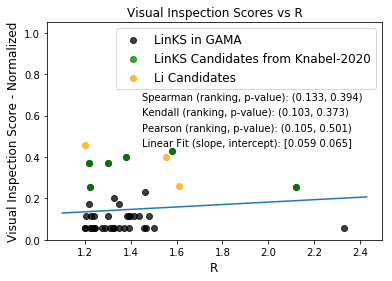

In [39]:
# visual inspection score to R

spear = np.around(stats.spearmanr(samples.normalized_score, samples.R)[:], 3)
pears = np.around(stats.pearsonr(samples.normalized_score, samples.R)[:], 3)
kendall = np.around(stats.kendalltau(samples.normalized_score, samples.R)[:], 3)

# fit a line
model = np.polyfit(samples.R, samples.normalized_score, 1)
x = np.linspace(np.min(samples.R) - 0.1, np.max(samples.R) + 0.1, num=100)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(#links.R,
          links.R,
    links.normalized_score,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(#links_identified.R,
           links_knabel.R,
    links_knabel.normalized_score,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(#li.R,
           li.R,
    li.normalized_score,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
ax.plot(x, model[0]*x + model[1])

plt.annotate(f'Spearman (ranking, p-value): ({spear[0]}, {spear[1]})', (1.45, 0.675))
plt.annotate(f'Kendall (ranking, p-value): ({kendall[0]}, {kendall[1]})', (1.45, 0.6))
plt.annotate(f'Pearson (ranking, p-value): ({pears[0]}, {pears[1]})', (1.45, 0.525))
plt.annotate(f'Linear Fit (slope, intercept): {np.around(model, 3)}', (1.45, 0.45))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('Visual Inspection Score - Normalized', fontsize = 12)
ax.set_xlabel('R',  fontsize = 12)
ax.set_title('Visual Inspection Scores vs R')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig(f'{png_path}visual_score_to_R_011821.png')

[array([0.133, 0.394]), array([0.105, 0.501]), array([0.103, 0.373]), array([0.05854399, 0.06491774])]
mean, std 0.0843552584214762 0.10987551541775689
mean, std 0.030690971233566487 0.14983535939953171


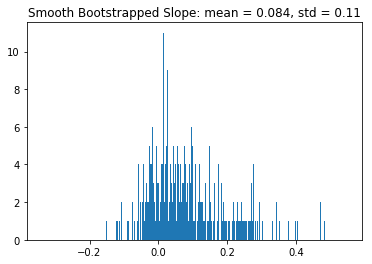

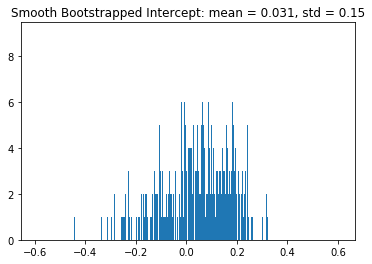

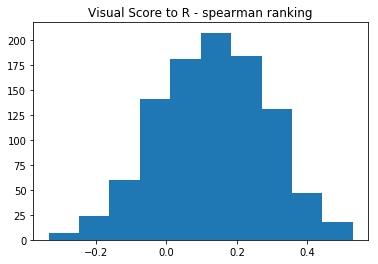

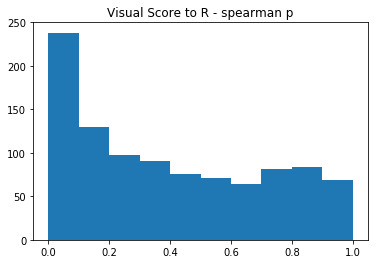

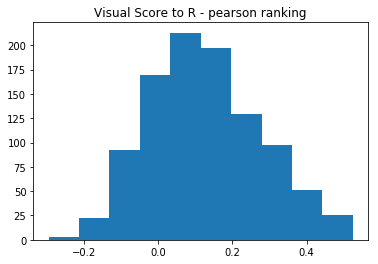

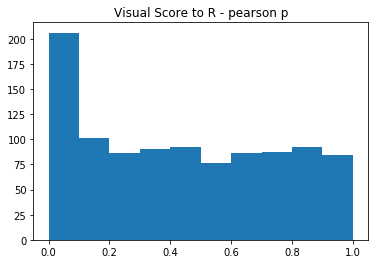

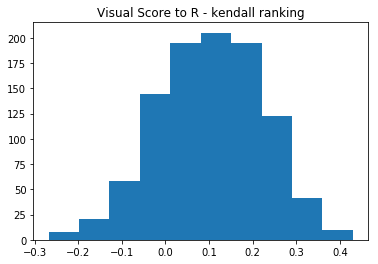

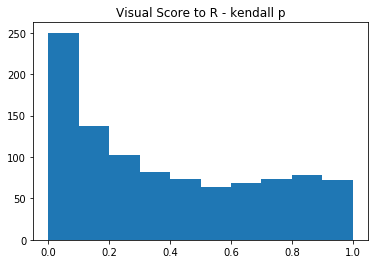

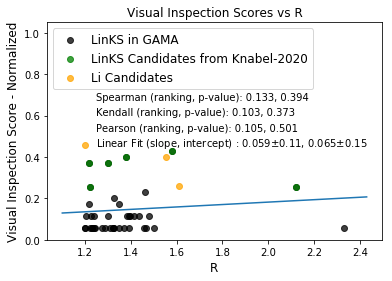

In [48]:
# run bootstrapping to see how the rankings change for normalized_score to sigma2 and R
# R

# create array to show stats (columns=spearman ranking, p,pearson ranking, p,kendall ranking, p), 43 iterations
bootstrapping_R = np.zeros((1000, 8), dtype=float)

#print(bootstrapping_R)

spear = np.around(stats.spearmanr(samples.normalized_score, samples.R)[:], 3)
pears = np.around(stats.pearsonr(samples.normalized_score, samples.R)[:], 3)
kendall = np.around(stats.kendalltau(samples.normalized_score, samples.R)[:], 3)
linear = np.polyfit(samples.R, samples.normalized_score, 1)

full_sample=[spear, pears, kendall, linear]
print(full_sample)

# take random samples of 30, omit 13 and replace with values from the 30
for i in range(1000):
    # shuffle the sample
    indices = np.arange(43)
    #print(indices)
    np.random.shuffle(indices)
    #print(indices)
    subsample_index = indices[:30]
    #print(len(np.unique(subsample_index)))
    bootstrap_index = np.random.choice(subsample_index, 13) # subsample 13 from subsample
    new_sample_index = np.concatenate((subsample_index, bootstrap_index)) # concat to new sample
    new_sample = samples.iloc[new_sample_index]
    # smooth x-values (R) using random gaussian
    #print(new_sample.R)
    #print(new_sample)
    
    # run tests
    spear = np.around(stats.spearmanr(new_sample.normalized_score, new_sample.R)[:], 3)
    pears = np.around(stats.pearsonr(new_sample.normalized_score, new_sample.R)[:], 3)
    kendall = np.around(stats.kendalltau(new_sample.normalized_score, new_sample.R)[:], 3)
    linear = np.around(np.polyfit(new_sample.R, new_sample.normalized_score, 1)[:], 3)
    #print(linear)
    #print(new_sample[['R', 'normalized_score']])
    #print(linear)
    bootstrapping_R[i] = (spear[0], spear[1], 
                               pears[0], pears[1], 
                               kendall[0], kendall[1],
                              linear[0], linear[1])
    smoothed_slopes = bootstrapping_R[:,6] + np.random.normal(loc=0.0, scale=0.001, size=1000)
    smoothed_intercepts = bootstrapping_R[:,7] + np.random.normal(loc=0.0, scale=0.001, size=1000) 
#print(bootstrapping_R)
#print(bootstrapping_R[:,6:])
fig, ax = plt.subplots()
ax.hist(smoothed_slopes, bins=1000)#, normed=True)
ax.set_title(f'Smooth Bootstrapped Slope: mean = {np.around(np.mean(smoothed_slopes), 3)}, std = {np.around(np.std(smoothed_slopes), 3)}')
print('mean, std', np.mean(smoothed_slopes), np.std(smoothed_slopes))
fig, ax = plt.subplots()
ax.hist(smoothed_intercepts, bins=1000)
ax.set_title(f'Smooth Bootstrapped Intercept: mean = {np.around(np.mean(smoothed_intercepts), 3)}, std = {np.around(np.std(smoothed_intercepts), 3)}')
print('mean, std', np.mean(smoothed_intercepts), np.std(smoothed_intercepts))

plt.figure()
plt.hist(bootstrapping_R[:,0], bins = 10)
plt.title('Visual Score to R - spearman ranking')
plt.figure()
plt.hist(bootstrapping_R[:,1], bins=10)
plt.title('Visual Score to R - spearman p')
plt.figure()
plt.hist(bootstrapping_R[:,2], bins = 10)
plt.title('Visual Score to R - pearson ranking')
plt.figure()
plt.hist(bootstrapping_R[:,3], bins=10)
plt.title('Visual Score to R - pearson p')
plt.figure()
plt.hist(bootstrapping_R[:,4], bins = 10)
plt.title('Visual Score to R - kendall ranking')
plt.figure()
plt.hist(bootstrapping_R[:,5], bins=10)
plt.title('Visual Score to R - kendall p')

spear = np.around(stats.spearmanr(samples.normalized_score, samples.R)[:], 3)
pears = np.around(stats.pearsonr(samples.normalized_score, samples.R)[:], 3)
kendall = np.around(stats.kendalltau(samples.normalized_score, samples.R)[:], 3)

# fit a line
model = np.polyfit(samples.R, samples.normalized_score, 1)
x = np.linspace(np.min(samples.R) - 0.1, np.max(samples.R) + 0.1, num=100)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(#links.R,
          links.R,
    links.normalized_score,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(#links_identified.R,
           links_knabel.R,
    links_knabel.normalized_score,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(#li.R,
           li.R,
    li.normalized_score,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
ax.plot(x, model[0]*x + model[1])

plt.annotate(f'Spearman (ranking, p-value): {spear[0]}, {spear[1]}', (1.25, 0.675))
plt.annotate(f'Kendall (ranking, p-value): {kendall[0]}, {kendall[1]}', (1.25, 0.6))
plt.annotate(f'Pearson (ranking, p-value): {pears[0]}, {pears[1]}', (1.25, 0.525))
plt.annotate(f'Linear Fit (slope, intercept) : {np.around(model[0], 3)}$\\pm${np.around(np.std(smoothed_slopes), 3)}, '\
                f'{np.around(model[1], 3)}$\\pm${np.around(np.std(smoothed_intercepts), 3)}', (1.25, 0.45))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('Visual Inspection Score - Normalized', fontsize = 12)
ax.set_xlabel('R',  fontsize = 12)
ax.set_title('Visual Inspection Scores vs R')
plt.legend(fontsize=12, loc='upper left')
#plt.show()

#plt.savefig(f'{png_path}visual_score_to_R_012021.png')

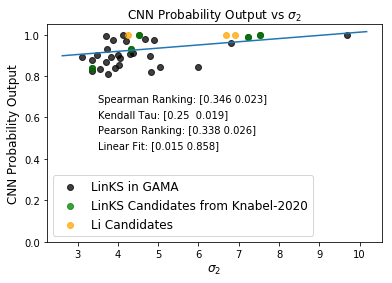

In [41]:
# CNN probability score vs sigma2


# statistical tests of correlation
spear = np.around(stats.spearmanr(samples.cnn_probability, samples.sigma2)[:], 3)
pears = np.around(stats.pearsonr(samples.cnn_probability, samples.sigma2)[:], 3)
kendall = np.around(stats.kendalltau(samples.cnn_probability, samples.sigma2)[:], 3)

# fit a line
model = np.polyfit(samples.sigma2, samples.cnn_probability, 1)
x = np.linspace(np.min(samples.sigma2) - 0.5, np.max(samples.sigma2) + 0.5, num=100)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(links.sigma2,
          #links.sigma2,
    links.P1,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(links_knabel.sigma2,
           #links_knabel.sigma2,
    links_knabel.P1,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(li.sigma2,
           #li.sigma2,
    li.probability,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
ax.plot(x, model[0]*x + model[1])

plt.annotate(f'Spearman Ranking: {spear}', (3.5, 0.675))
plt.annotate(f'Kendall Tau: {kendall}', (3.5, 0.6))
plt.annotate(f'Pearson Ranking: {pears}', (3.5, 0.525))
plt.annotate(f'Linear Fit: {np.around(model, 3)}', (3.5, 0.45))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('CNN Probability Output', fontsize = 12)
ax.set_xlabel('$\sigma_2$',  fontsize = 12)
ax.set_title('CNN Probability Output vs $\sigma_2$')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig(f'{png_path}cnn_score_to_sigma2_011821.png')

[array([0.346, 0.023]), array([0.338, 0.026]), array([0.25 , 0.019]), array([0.01542999, 0.85751215])]
mean, std 0.01532222423544757 0.004758162481458454
mean, std 0.8575325656935263 0.023418858178614745


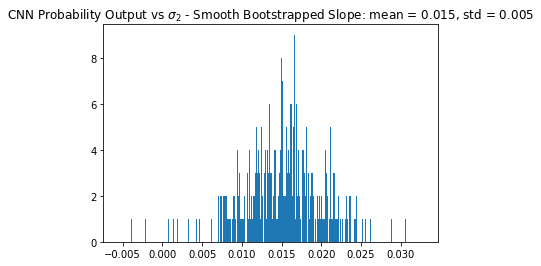

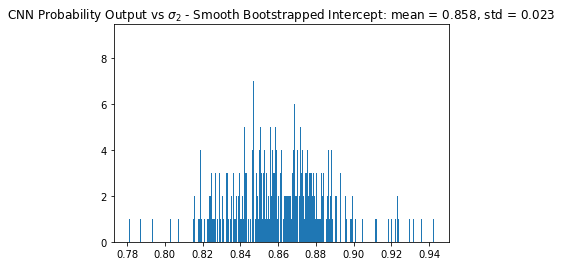

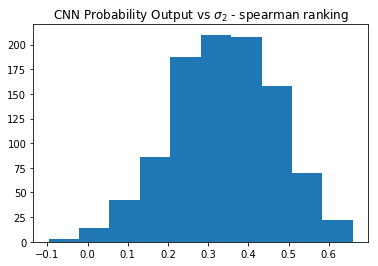

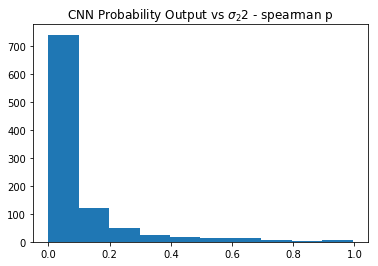

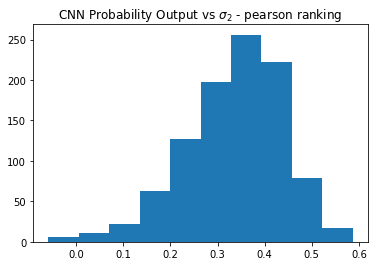

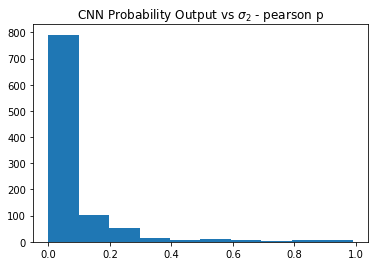

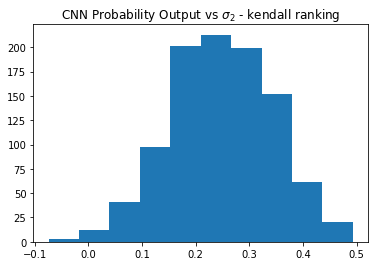

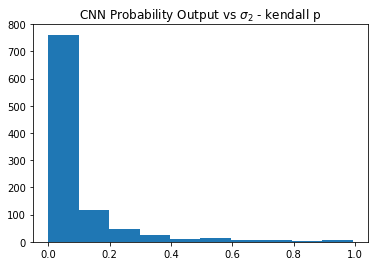

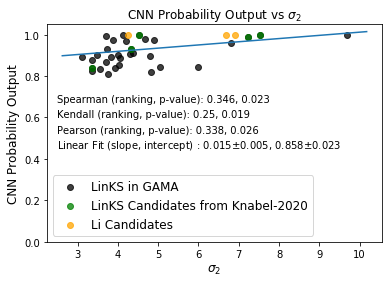

In [47]:
# run bootstrapping to see how the rankings change for cnn_probability to sigma2 and R
# sigma2

# create array to show stats (columns=spearman ranking, p,pearson ranking, p,kendall ranking, p), 43 iterations
bootstrapping_sigma2 = np.zeros((1000, 8), dtype=float)

#print(bootstrapping_sigma2)

spear = np.around(stats.spearmanr(samples.cnn_probability, samples.sigma2)[:], 3)
pears = np.around(stats.pearsonr(samples.cnn_probability, samples.sigma2)[:], 3)
kendall = np.around(stats.kendalltau(samples.cnn_probability, samples.sigma2)[:], 3)
linear = np.polyfit(samples.sigma2, samples.cnn_probability, 1)

full_sample=[spear, pears, kendall, linear]
print(full_sample)

# take random samples of 30, omit 13 and replace with values from the 30
for i in range(1000):
    # shuffle the sample
    indices = np.arange(43)
    #print(indices)
    np.random.shuffle(indices)
    #print(indices)
    subsample_index = indices[:30]
    #print(len(np.unique(subsample_index)))
    bootstrap_index = np.random.choice(subsample_index, 13) # subsample 13 from subsample
    new_sample_index = np.concatenate((subsample_index, bootstrap_index)) # concat to new sample
    new_sample = samples.iloc[new_sample_index]
    # smooth x-values (sigma2) using random gaussian
    #print(new_sample.sigma2)
    #print(new_sample)
    
    # run tests
    spear = np.around(stats.spearmanr(new_sample.cnn_probability, new_sample.sigma2)[:], 3)
    pears = np.around(stats.pearsonr(new_sample.cnn_probability, new_sample.sigma2)[:], 3)
    kendall = np.around(stats.kendalltau(new_sample.cnn_probability, new_sample.sigma2)[:], 3)
    linear = np.around(np.polyfit(new_sample.sigma2, new_sample.cnn_probability, 1)[:], 3)
    #print(linear)
    #print(new_sample[['sigma2', 'cnn_probability']])
    #print(linear)
    bootstrapping_sigma2[i] = (spear[0], spear[1], 
                               pears[0], pears[1], 
                               kendall[0], kendall[1],
                              linear[0], linear[1])
    smoothed_slopes = bootstrapping_sigma2[:,6] + np.random.normal(loc=0.0, scale=0.001, size=1000)
    smoothed_intercepts = bootstrapping_sigma2[:,7] + np.random.normal(loc=0.0, scale=0.001, size=1000) 
#print(bootstrapping_sigma2)
#print(bootstrapping_sigma2[:,6:])
fig, ax = plt.subplots()
ax.hist(smoothed_slopes, bins=1000)#, normed=True)
ax.set_title(f'CNN Probability Output vs $\sigma_2$ - Smooth Bootstrapped Slope: mean = {np.around(np.mean(smoothed_slopes), 3)}, std = {np.around(np.std(smoothed_slopes), 3)}')
print('mean, std', np.mean(smoothed_slopes), np.std(smoothed_slopes))
fig, ax = plt.subplots()
ax.hist(smoothed_intercepts, bins=1000)
ax.set_title(f'CNN Probability Output vs $\sigma_2$ - Smooth Bootstrapped Intercept: mean = {np.around(np.mean(smoothed_intercepts), 3)}, std = {np.around(np.std(smoothed_intercepts), 3)}')
print('mean, std', np.mean(smoothed_intercepts), np.std(smoothed_intercepts))
plt.figure()
plt.hist(bootstrapping_sigma2[:,0], bins = 10)
plt.title('CNN Probability Output vs $\sigma_2$ - spearman ranking')
plt.figure()
plt.hist(bootstrapping_sigma2[:,1], bins=10)
plt.title('CNN Probability Output vs $\sigma_2$2 - spearman p')
plt.figure()
plt.hist(bootstrapping_sigma2[:,2], bins = 10)
plt.title('CNN Probability Output vs $\sigma_2$ - pearson ranking')
plt.figure()
plt.hist(bootstrapping_sigma2[:,3], bins=10)
plt.title('CNN Probability Output vs $\sigma_2$ - pearson p')
plt.figure()
plt.hist(bootstrapping_sigma2[:,4], bins = 10)
plt.title('CNN Probability Output vs $\sigma_2$ - kendall ranking')
plt.figure()
plt.hist(bootstrapping_sigma2[:,5], bins=10)
plt.title('CNN Probability Output vs $\sigma_2$ - kendall p')

# CNN probability score vs sigma2


# statistical tests of correlation
spear = np.around(stats.spearmanr(samples.cnn_probability, samples.sigma2)[:], 3)
pears = np.around(stats.pearsonr(samples.cnn_probability, samples.sigma2)[:], 3)
kendall = np.around(stats.kendalltau(samples.cnn_probability, samples.sigma2)[:], 3)

# fit a line
model = np.polyfit(samples.sigma2, samples.cnn_probability, 1)
x = np.linspace(np.min(samples.sigma2) - 0.5, np.max(samples.sigma2) + 0.5, num=100)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(links.sigma2,
          #links.sigma2,
    links.P1,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(links_knabel.sigma2,
           #links_knabel.sigma2,
    links_knabel.P1,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(li.sigma2,
           #li.sigma2,
    li.probability,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
ax.plot(x, model[0]*x + model[1])

plt.annotate(f'Spearman (ranking, p-value): {spear[0]}, {spear[1]}', (2.5, 0.675))
plt.annotate(f'Kendall (ranking, p-value): {kendall[0]}, {kendall[1]}', (2.5, 0.6))
plt.annotate(f'Pearson (ranking, p-value): {pears[0]}, {pears[1]}', (2.5, 0.525))
plt.annotate(f'Linear Fit (slope, intercept) : {np.around(model[0], 3)}$\\pm${np.around(np.std(smoothed_slopes), 3)}, '\
                f'{np.around(model[1], 3)}$\\pm${np.around(np.std(smoothed_intercepts), 3)}', (2.5, 0.45))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('CNN Probability Output', fontsize = 12)
ax.set_xlabel('$\sigma_2$',  fontsize = 12)
ax.set_title('CNN Probability Output vs $\sigma_2$')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig(f'{png_path}cnn_score_to_sigma2_012021.png')

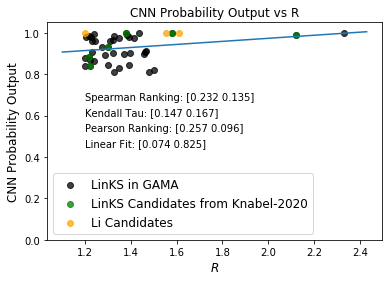

In [9]:
# CNN probability scores vs R

spear = np.around(stats.spearmanr(samples.cnn_probability, samples.R)[:], 3)
pears = np.around(stats.pearsonr(samples.cnn_probability, samples.R)[:], 3)
kendall = np.around(stats.kendalltau(samples.cnn_probability, samples.R)[:], 3)

# fit a line
model = np.polyfit(samples.R, samples.cnn_probability, 1)
x = np.linspace(np.min(samples.R) - 0.1, np.max(samples.R) + 0.1, num=100)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(links.R,
          #links.sigma2,
    links.cnn_probability,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(links_knabel.R,
           #links_knabel.sigma2,
    links_knabel.cnn_probability,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(li.R,
           #li.sigma2,
    li.cnn_probability,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
ax.plot(x, model[0]*x + model[1])

plt.annotate(f'Spearman Ranking: {spear}', (1.2, 0.675))
plt.annotate(f'Kendall Tau: {kendall}', (1.2, 0.6))
plt.annotate(f'Pearson Ranking: {pears}', (1.2, 0.525))
plt.annotate(f'Linear Fit: {np.around(model, 3)}', (1.2, 0.45))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('CNN Probability Output', fontsize = 12)
ax.set_xlabel('$R$',  fontsize = 12)
ax.set_title('CNN Probability Output vs R')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig(f'{png_path}cnn_score_to_R_011821.png')

[array([0.232, 0.135]), array([0.257, 0.096]), array([0.147, 0.167]), array([0.07397611, 0.82505876])]
mean, std 0.07293772486964281 0.028703916086645194
mean, std 0.8264177318830995 0.04088167809907715


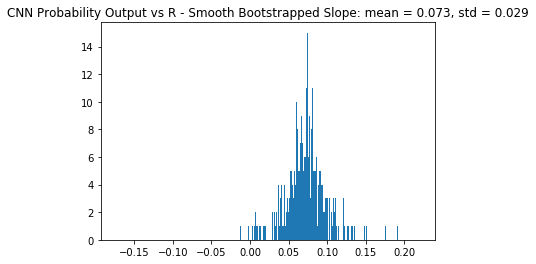

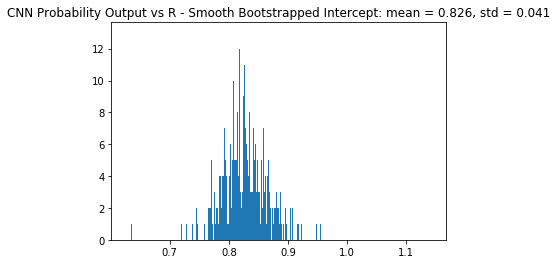

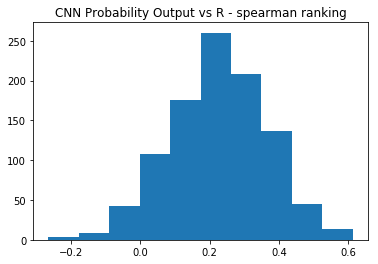

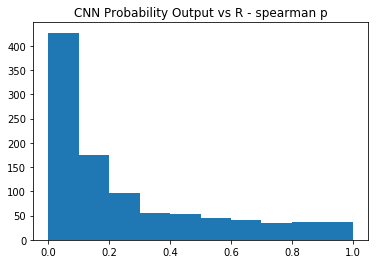

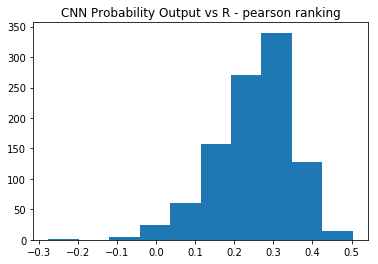

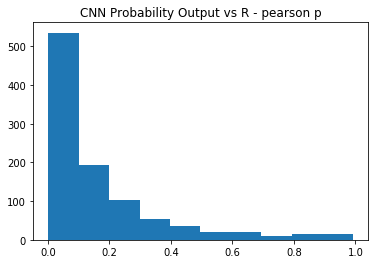

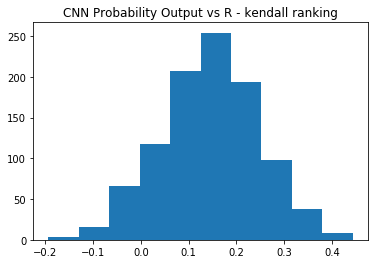

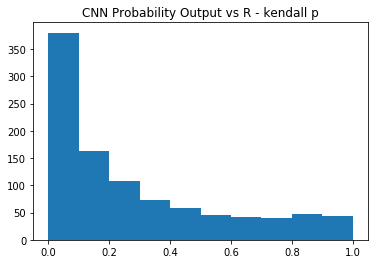

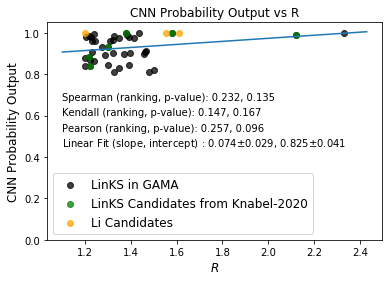

In [46]:
# run bootstrapping to see how the rankings change for cnn_probability to sigma2 and R
# R

# create array to show stats (columns=spearman ranking, p,pearson ranking, p,kendall ranking, p), 43 iterations
bootstrapping_R = np.zeros((1000, 8), dtype=float)

#print(bootstrapping_R)

spear = np.around(stats.spearmanr(samples.cnn_probability, samples.R)[:], 3)
pears = np.around(stats.pearsonr(samples.cnn_probability, samples.R)[:], 3)
kendall = np.around(stats.kendalltau(samples.cnn_probability, samples.R)[:], 3)
linear = np.polyfit(samples.R, samples.cnn_probability, 1)

full_sample=[spear, pears, kendall, linear]
print(full_sample)

# take random samples of 30, omit 13 and replace with values from the 30
for i in range(1000):
    # shuffle the sample
    indices = np.arange(43)
    #print(indices)
    np.random.shuffle(indices)
    #print(indices)
    subsample_index = indices[:30]
    #print(len(np.unique(subsample_index)))
    bootstrap_index = np.random.choice(subsample_index, 13) # subsample 13 from subsample
    new_sample_index = np.concatenate((subsample_index, bootstrap_index)) # concat to new sample
    new_sample = samples.iloc[new_sample_index]
    # smooth x-values (R) using random gaussian
    #print(new_sample.R)
    #print(new_sample)
    
    # run tests
    spear = np.around(stats.spearmanr(new_sample.cnn_probability, new_sample.R)[:], 3)
    pears = np.around(stats.pearsonr(new_sample.cnn_probability, new_sample.R)[:], 3)
    kendall = np.around(stats.kendalltau(new_sample.cnn_probability, new_sample.R)[:], 3)
    linear = np.around(np.polyfit(new_sample.R, new_sample.cnn_probability, 1)[:], 3)
    #print(linear)
    #print(new_sample[['R', 'cnn_probability']])
    #print(linear)
    bootstrapping_R[i] = (spear[0], spear[1], 
                               pears[0], pears[1], 
                               kendall[0], kendall[1],
                              linear[0], linear[1])
    smoothed_slopes = bootstrapping_R[:,6] + np.random.normal(loc=0.0, scale=0.001, size=1000)
    smoothed_intercepts = bootstrapping_R[:,7] + np.random.normal(loc=0.0, scale=0.001, size=1000) 
#print(bootstrapping_R)
#print(bootstrapping_R[:,6:])
fig, ax = plt.subplots()
ax.hist(smoothed_slopes, bins=1000)#, normed=True)
ax.set_title(f'CNN Probability Output vs R - Smooth Bootstrapped Slope: mean = {np.around(np.mean(smoothed_slopes), 3)}, std = {np.around(np.std(smoothed_slopes), 3)}')
print('mean, std', np.mean(smoothed_slopes), np.std(smoothed_slopes))
fig, ax = plt.subplots()
ax.hist(smoothed_intercepts, bins=1000)
ax.set_title(f'CNN Probability Output vs R - Smooth Bootstrapped Intercept: mean = {np.around(np.mean(smoothed_intercepts), 3)}, std = {np.around(np.std(smoothed_intercepts), 3)}')
print('mean, std', np.mean(smoothed_intercepts), np.std(smoothed_intercepts))

plt.figure()
plt.hist(bootstrapping_R[:,0], bins = 10)
plt.title('CNN Probability Output vs R - spearman ranking')
plt.figure()
plt.hist(bootstrapping_R[:,1], bins=10)
plt.title('CNN Probability Output vs R - spearman p')
plt.figure()
plt.hist(bootstrapping_R[:,2], bins = 10)
plt.title('CNN Probability Output vs R - pearson ranking')
plt.figure()
plt.hist(bootstrapping_R[:,3], bins=10)
plt.title('CNN Probability Output vs R - pearson p')
plt.figure()
plt.hist(bootstrapping_R[:,4], bins = 10)
plt.title('CNN Probability Output vs R - kendall ranking')
plt.figure()
plt.hist(bootstrapping_R[:,5], bins=10)
plt.title('CNN Probability Output vs R - kendall p')


# CNN probability scores vs R

spear = np.around(stats.spearmanr(samples.cnn_probability, samples.R)[:], 3)
pears = np.around(stats.pearsonr(samples.cnn_probability, samples.R)[:], 3)
kendall = np.around(stats.kendalltau(samples.cnn_probability, samples.R)[:], 3)

# fit a line
model = np.polyfit(samples.R, samples.cnn_probability, 1)
x = np.linspace(np.min(samples.R) - 0.1, np.max(samples.R) + 0.1, num=100)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(links.R,
          #links.sigma2,
    links.cnn_probability,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(links_knabel.R,
           #links_knabel.sigma2,
    links_knabel.cnn_probability,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(li.R,
           #li.sigma2,
    li.cnn_probability,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
ax.plot(x, model[0]*x + model[1])

plt.annotate(f'Spearman (ranking, p-value): {spear[0]}, {spear[1]}', (1.1, 0.675))
plt.annotate(f'Kendall (ranking, p-value): {kendall[0]}, {kendall[1]}', (1.1, 0.6))
plt.annotate(f'Pearson (ranking, p-value): {pears[0]}, {pears[1]}', (1.1, 0.525))
plt.annotate(f'Linear Fit (slope, intercept) : {np.around(model[0], 3)}$\\pm${np.around(np.std(smoothed_slopes), 3)}, '\
                f'{np.around(model[1], 3)}$\\pm${np.around(np.std(smoothed_intercepts), 3)}', (1.1, 0.45))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('CNN Probability Output', fontsize = 12)
ax.set_xlabel('$R$',  fontsize = 12)
ax.set_title('CNN Probability Output vs R')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig(f'{png_path}cnn_score_to_R_012021.png')